In [42]:
import cv2 
import dlib 
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from imutils.face_utils import FaceAligner


### Preprocessing

#### Detect face region

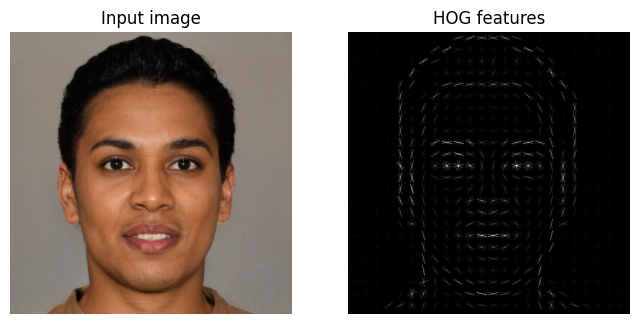

In [43]:
# Mô phỏng sử dụng HOG trong phát hiện vùng khuôn mặt 
# biểu diễn các đường nét chính của khuôn mặt dựa trên phương và độ lớn gradient thông qua các véc tơ trên mỗi cell 
image = cv2.imread('Test Image/face2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def apply_hog(face):
    fd,hog_image = hog(face,orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis = -1)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.imshow(face, cmap=plt.cm.gray)
    ax1.set_title('Input image')
    ax1.set_axis_off()

    ax2.imshow(hog_image, cmap=plt.cm.gray)
    ax2.set_title('HOG features')
    ax2.set_axis_off()
apply_hog(image)


    

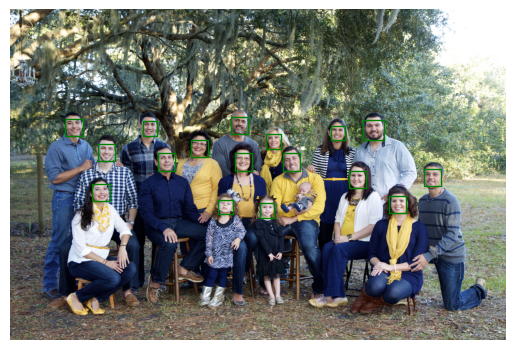

In [44]:
# Ap dung HOG trong thu vien dlib de phat hien cac vung khuon mat

def detect_face_region(image):
    hog_detector = dlib.get_frontal_face_detector()
    # Phat hien vung khuon mat 
    faces = hog_detector(image)

    # Ve vung khuon mat cho image
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.set_axis_off()
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='green', linewidth=1)
        ax.add_patch(rect)
    
    plt.show()

# image = cv2.imread('Test Image/face3+.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image1 = cv2.imread('Test Image/face3+.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
# detect_face_region(image)
detect_face_region(image1)

#### Detect facial lanmarks

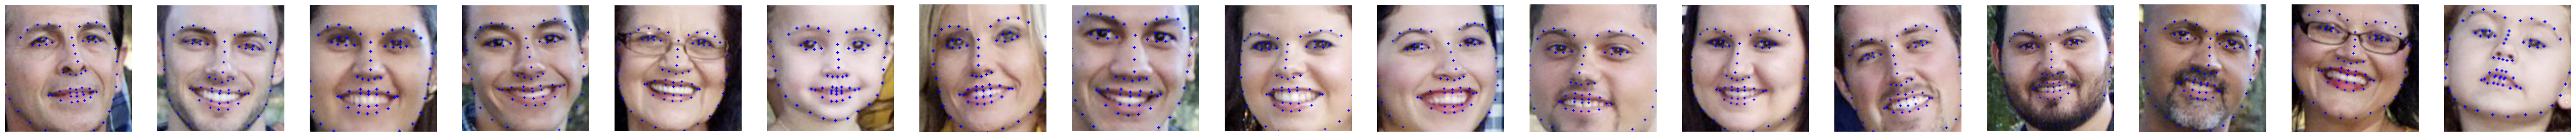

In [45]:
## Detech face 
def find_detected_face(image):
    hog_detector = dlib.get_frontal_face_detector()
    # Phat hien vung khuon mat 
    faces = hog_detector(image)
    
    detected_faces = []
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        detected_face = image[y1:y2, x1:x2]
        detected_faces.append(detected_face)
    return detected_faces

## detect Facial Landmark
def detect_facial_landmarks(image):
    predictor = dlib.shape_predictor('dataset/shape_predictor_68_face_landmarks.dat')
    faces = find_detected_face(image)
    num_faces = len(faces)
    fig, axes = plt.subplots(ncols=len(faces), figsize=(4*num_faces, 5))
    landmarks_list = []
    for i, face in enumerate(faces):
        # Convert image to grayscale
        shape = predictor(face, dlib.rectangle(0, 0, face.shape[1], face.shape[0]))
        landmarks = np.zeros((68, 2), dtype=int)
        for j in range(68):
            landmarks[j] = (shape.part(j).x, shape.part(j).y)
        for (x,y) in landmarks:
            cv2.circle(face,(x,y),1,(0, 0, 255),-1)
        axes[i].imshow(face, extent=[0, face.shape[1], face.shape[0], 0])
        axes[i].axis('off')
    plt.show()
image = cv2.imread('Test Image/face3+.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
detect_facial_landmarks(image)

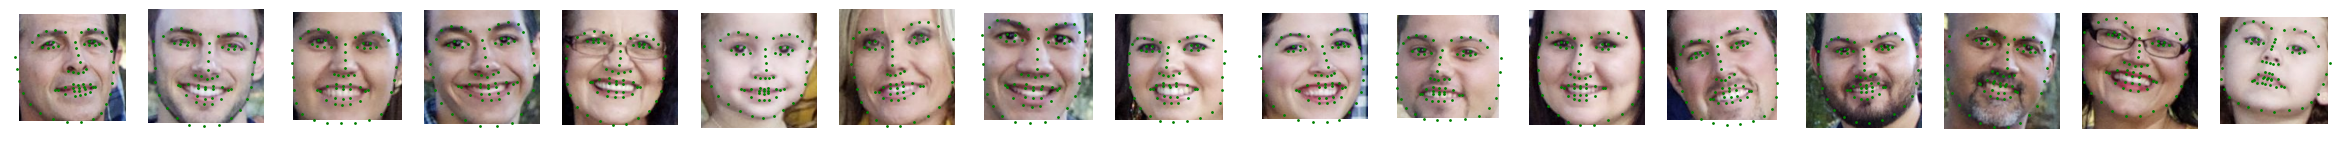

In [46]:
# Sau khi phat hien cac vung noi bat chung ta se tien hanh căn chỉnh độ nghiêng của khuôn mặt.

def find_facial_landmarks(image):
    predictor = dlib.shape_predictor('dataset/shape_predictor_68_face_landmarks.dat')
    faces = find_detected_face(image)
    landmarks_list = []
    # for face in faces:
    #     shape = predictor(face, dlib.rectangle(0, 0, face.shape[1], face.shape[0]))
    #     landmarks = np.zeros((68, 2), dtype=int)
    #     for j in range(68):
    #         landmarks[j] = (shape.part(j).x, shape.part(j).y)
    #     # Luu tru landmarks trong dict
    #     landmarks_dict = {'face_box': face, 'landmarks': landmarks}
    #     landmarks_list.append(landmarks_dict)
    for face in faces:
        shape = predictor(face, dlib.rectangle(0, 0, face.shape[1], face.shape[0]))
        landmarks = list(map(lambda p: (p.x, p.y), shape.parts()))
        landmarks_list.append(landmarks)
    return landmarks_list
def show_facial_landmarks(image):
    faces = find_detected_face(image)
    landmarks_list = find_facial_landmarks(image)
    fig, axs = plt.subplots(1, len(faces), figsize=(30, 5))
    
    for i, face in enumerate(faces):
        axs[i].imshow(face)
        axs[i].scatter([p[0] for p in landmarks_list[i]], [p[1] for p in landmarks_list[i]], c='g', s=1)
        axs[i].axis('off')
    plt.show()



image = cv2.imread('Test Image/face3+.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_facial_landmarks(image)

In [35]:
TEMPLATE = np.float32([
    (0.0792396913815, 0.339223741112), (0.0829219487236, 0.456955367943),
    (0.0967927109165, 0.575648016728), (0.122141515615, 0.691921601066),
    (0.168687863544, 0.800341263616), (0.239789390707, 0.895732504778),
    (0.325662452515, 0.977068762493), (0.422318282013, 1.04329000149),
    (0.531777802068, 1.06080371126), (0.641296298053, 1.03981924107),
    (0.738105872266, 0.972268833998), (0.824444363295, 0.889624082279),
    (0.894792677532, 0.792494155836), (0.939395486253, 0.681546643421),
    (0.96111933829, 0.562238253072), (0.970579841181, 0.441758925744),
    (0.971193274221, 0.322118743967), (0.163846223133, 0.249151738053),
    (0.21780354657, 0.204255863861), (0.291299351124, 0.192367318323),
    (0.367460241458, 0.203582210627), (0.4392945113, 0.233135599851),
    (0.586445962425, 0.228141644834), (0.660152671635, 0.195923841854),
    (0.737466449096, 0.182360984545), (0.813236546239, 0.192828009114),
    (0.8707571886, 0.235293377042), (0.51534533827, 0.31863546193),
    (0.516221448289, 0.396200446263), (0.517118861835, 0.473797687758),
    (0.51816430343, 0.553157797772), (0.433701156035, 0.604054457668),
    (0.475501237769, 0.62076344024), (0.520712933176, 0.634268222208),
    (0.565874114041, 0.618796581487), (0.607054002672, 0.60157671656),
    (0.252418718401, 0.331052263829), (0.298663015648, 0.302646354002),
    (0.355749724218, 0.303020650651), (0.403718978315, 0.33867711083),
    (0.352507175597, 0.349987615384), (0.296791759886, 0.350478978225),
    (0.631326076346, 0.334136672344), (0.679073381078, 0.29645404267),
    (0.73597236153, 0.294721285802), (0.782865376271, 0.321305281656),
    (0.740312274764, 0.341849376713), (0.68499850091, 0.343734332172),
    (0.353167761422, 0.746189164237), (0.414587777921, 0.719053835073),
    (0.477677654595, 0.706835892494), (0.522732900812, 0.717092275768),
    (0.569832064287, 0.705414478982), (0.635195811927, 0.71565572516),
    (0.69951672331, 0.739419187253), (0.639447159575, 0.805236879972),
    (0.576410514055, 0.835436670169), (0.525398405766, 0.841706377792),
    (0.47641545769, 0.837505914975), (0.41379548902, 0.810045601727),
    (0.380084785646, 0.749979603086), (0.477955996282, 0.74513234612),
    (0.523389793327, 0.748924302636), (0.571057789237, 0.74332894691),
    (0.672409137852, 0.744177032192), (0.572539621444, 0.776609286626),
    (0.5240106503, 0.783370783245), (0.477561227414, 0.778476346951)])

TPL_MIN, TPL_MAX = np.min(TEMPLATE, axis=0), np.max(TEMPLATE, axis=0)
MINMAX_TEMPLATE = (TEMPLATE - TPL_MIN) / (TPL_MAX - TPL_MIN)

INNER_EYES_AND_BOTTOM_LIP = [39, 42, 57]
OUTER_EYES_AND_NOSE = [36, 45, 33]

landmarkIndices=OUTER_EYES_AND_NOSE = [36, 45, 33]

#npLandmarks = np.float32(landmarks)
npLandmarkIndices = np.array(landmarkIndices)

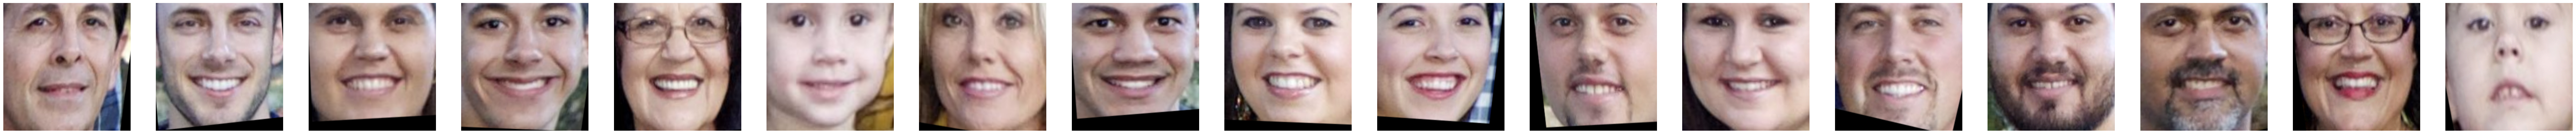

In [55]:
def align_face(image):
    faces = find_detected_face(image)
    landmarks_list = find_facial_landmarks(image)
    align_faces = []
    for face, landmarks in zip(faces, landmarks_list):
        np_landmarks = np.float32(landmarks)
        np_landmark_indices = np.array(INNER_EYES_AND_BOTTOM_LIP)
        h = cv2.getAffineTransform(np_landmarks[np_landmark_indices],
                                   MINMAX_TEMPLATE[np_landmark_indices]*256)
        align_face = cv2.warpAffine(face, h, (256, 256))
        align_faces.append(align_face)
    return align_faces
# Display aligned faces
def show_align_face(image):
    aligned_faces = align_face(image)
    fig, axs = plt.subplots(1, len(aligned_faces), figsize=(100, 5))
    for i, face in enumerate(aligned_faces):
        axs[i].imshow(face)
        axs[i].axis('off')
    plt.show()

image = cv2.imread('Test Image/face3+.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_align_face(image)

### Feature Extraction


 xây dựng một vectơ đặc trưng đại diện cho thông tin pixel quan trọng của nó. Các vectơ đặc trưng này được sử dụng trong quá trình gom cụm

#### SIFT:

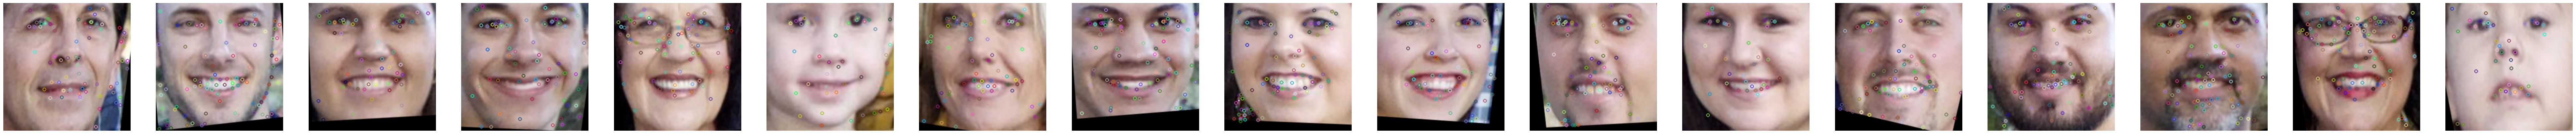

In [59]:
def apply_sift(image):
    sift_features = []
    aligned_faces = align_face(image)
    sift = cv2.SIFT_create()
    keypoints_list = []
    for face in aligned_faces:
        gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        keypoints, descriptors = sift.detectAndCompute(gray,None)
        sift_features.append(descriptors)
        keypoints_list.append(keypoints)
    return keypoints_list,sift_features

def show_sift_features(image):
    keypoints_list, _ = apply_sift(image)
    aligned_faces = align_face(image)
    fig, axs = plt.subplots(1, len(aligned_faces), figsize=(100, 5))
    for i, face in enumerate(aligned_faces):
        keypoints = keypoints_list[i]
        img = cv2.drawKeypoints(face, keypoints, face)
        axs[i].imshow(img)
        axs[i].axis('off')
    plt.show()

image = cv2.imread('Test Image/face3+.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_sift_features(image)